In [29]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')

import time
import scipy
import numpy as np

from apricot import FeatureBasedSelection
from apricot.optimizers import RandomGreedy
from sklearn.datasets import fetch_covtype

In [3]:
digits_data = fetch_covtype()

In [30]:
X_digits = np.abs(digits_data.data)

In [5]:
k = 1000

In [5]:
tic = time.time()
model0 = FeatureBasedSelection(k, optimizer='naive', verbose=True)
model0.fit(X_digits)
toc0 = time.time() - tic

100%|█████████████████████████████████████████████████████████████████████████████████████| 1.00k/1.00k [01:25<00:00, 11.7it/s]


In [12]:
# tic = time.time()
# model1 = FeatureBasedSelection(k, optimizer='random', verbose=True)
# model1.fit(X_digits)
# toc1 = time.time() - tic

In [7]:
tic = time.time()
model2 = FeatureBasedSelection(k, optimizer='approximate-lazy', verbose=True)
model2.fit(X_digits)
toc2 = time.time() - tic

100%|█████████████████████████████████████████████████████████████████████████████████████| 1.00k/1.00k [09:03<00:00, 1.84it/s]


In [6]:
tic = time.time()
model3 = FeatureBasedSelection(k, optimizer='stochastic', verbose=True)
model3.fit(X_digits)
toc3 = time.time() - tic

100%|█████████████████████████████████████████████████████████████████████████████████████| 1.00k/1.00k [00:12<00:00, 80.0it/s]


In [9]:
tic = time.time()
model4 = FeatureBasedSelection(k, optimizer='sample', verbose=True)
model4.fit(X_digits)
toc4 = time.time() - tic

100%|█████████████████████████████████████████████████████████████████████████████████████| 1.00k/1.00k [10:22<00:00, 1.61it/s]


In [10]:
tic = time.time()
model5 = FeatureBasedSelection(k, optimizer='greedi', verbose=True)
model5.fit(X_digits)
toc5 = time.time() - tic

2.00kit [08:10, 4.08it/s]                                                                                                      
100%|██████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:34<00:00, 28.63it/s]


In [11]:
tic = time.time()
model6 = FeatureBasedSelection(k, optimizer='modular', verbose=True)
model6.fit(X_digits)
toc6 = time.time() - tic

100%|██████████████████████████████████████████████████████████████████████████████████████| 1.00k/1.00k [00:01<00:00, 510it/s]


In [12]:
idxs = np.random.choice(X_digits.shape[0], replace=False, size=k)

In [13]:
X_subset = X_digits[idxs]
gains = np.cumsum(X_subset, axis=0)
gains = np.sqrt(gains).sum(axis=1)

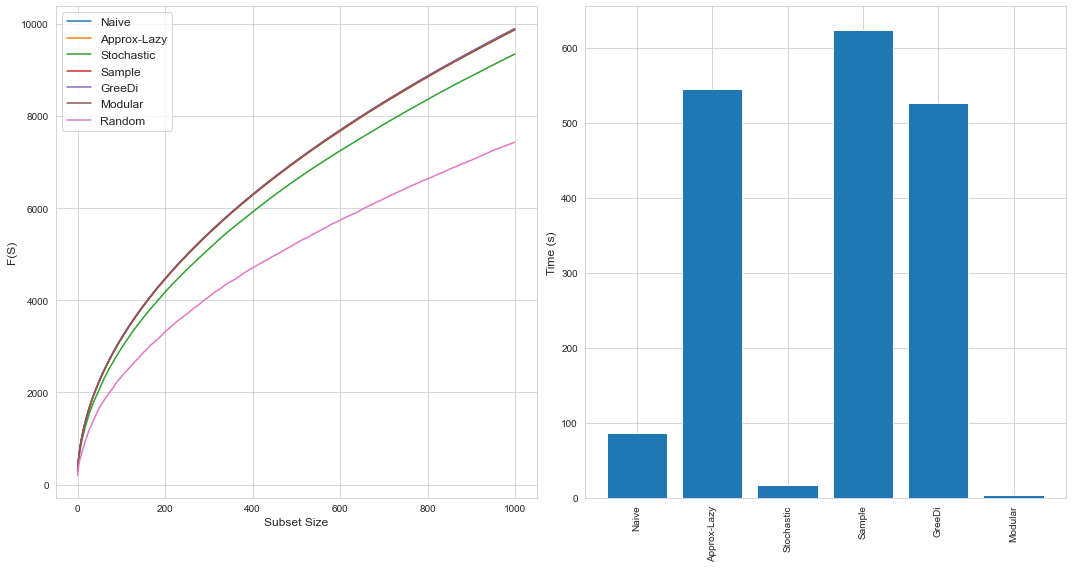

In [16]:
plt.figure(figsize=(15, 8))
plt.subplot(121)
plt.plot(np.cumsum(model0.gains), label="Naive")
#plt.plot(np.cumsum(model1.gains), label="Lazy")
plt.plot(np.cumsum(model2.gains), label="Approx-Lazy")
plt.plot(np.cumsum(model3.gains), label="Stochastic")
plt.plot(np.cumsum(model4.gains), label="Sample")
plt.plot(np.cumsum(model5.gains), label="GreeDi")
plt.plot(np.cumsum(model6.gains), label="Modular")

plt.plot(gains, label="Random")

plt.ylabel("F(S)", fontsize=12)
plt.xlabel("Subset Size", fontsize=12)

plt.legend(fontsize=12)

plt.subplot(122)
plt.bar(range(6), [toc0,  toc2, toc3, toc4, toc5, toc6])
plt.ylabel("Time (s)", fontsize=12)
plt.xticks(range(6), ['Naive', 'Approx-Lazy', 'Stochastic', 'Sample', 'GreeDi', 'Modular'], rotation=90) 
plt.tight_layout()
plt.show()